In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import math
from shapely.geometry import Point

In [2]:
#ruta_archivo = "C:\\Users\\jramirez_voyansi\\Desktop\\Ironhack\\Proyecto_Final\\bcn_dataset2015_2019.csv"

ruta_archivo = "C:\\Users\\jramirez_voyansi\\Desktop\\Ironhack\\Proyecto_Final\\bcn_dataset2015_2019.csv"

data = pd.read_csv(ruta_archivo)

In [3]:
data.head()

,Unnamed: 0,year,neighbourhood,population,% spaniards,% strangers,% w/ higher education,unemployed,total_surface(m2),housing(m2),...,disp_income(€/year),year_mean,RFD100,gini_index(%),new_household_purchases,protected_household_purchases,used_household_purchases,new_household_purchases(x1000€),Used_household_purchases(x1000€),Total_household_purchases(x1000€)
0,0,2015,Baró de Viver,2482.0,89.7,10.3,5.7,150.0,110971,80219,...,11217.0,18997.739726,59.043866,33.450000,0.0,0.0,8.0,NaN,261.8,261.8
1,1,2015,Can Baró,8938.0,86.9,13.1,24.2,442.0,413313,318343,...,18883.0,18997.739726,99.396035,32.800000,0.0,0.0,59.0,NaN,129.1,129.1
2,2,2015,Can Peguera,2267.0,92.9,7.1,7.0,141.0,69811,56595,...,12002.0,18997.739726,63.175937,34.450000,0.0,0.0,5.0,NaN,80.5,80.5
3,3,2015,Canyelles,6946.0,95.9,4.1,10.4,554.0,309727,240025,...,17003.0,18997.739726,89.500121,26.140000,0.0,0.0,31.0,NaN,123.6,123.6
4,4,2015,Ciutat Meridiana,10156.0,72.2,27.8,5.7,1146.0,271520,228636,...,10203.0,18997.739726,53.706389,34.566667,0.0,0.0,68.0,NaN,60.2,60.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         365 non-null    int64  
 1   year                               365 non-null    int64  
 2   neighbourhood                      365 non-null    object 
 3   population                         365 non-null    float64
 4   % spaniards                        365 non-null    float64
 5   % strangers                        365 non-null    float64
 6   % w/ higher education              365 non-null    float64
 7   unemployed                         365 non-null    float64
 8   total_surface(m2)                  365 non-null    int64  
 9   housing(m2)                        365 non-null    int64  
 10  parking(m2)                        365 non-null    int64  
 11  commerce(m2)                       365 non-null    int64  

In [5]:
data.isnull().sum()

Unnamed: 0                             0
year                                   0
neighbourhood                          0
population                             0
% spaniards                            0
% strangers                            0
% w/ higher education                  0
unemployed                             0
total_surface(m2)                      0
housing(m2)                            0
parking(m2)                            0
commerce(m2)                           0
industry(m2)                           0
offices(m2)                            0
education(m2)                          0
healthcare(m2)                         0
hostelry(m2)                           0
sports(m2)                             0
religious(m2)                          0
entertainment(m2)                      0
other_uses(m2)                         0
avg_€/month                           14
avg_€/m2                              14
avg_housing(m2)                       14
new_contracts_10

In [6]:
#Los valores nulos, son valores faltantes (0), se toma la decisión de rellenarlos con la media

data['avg_€/month'].fillna(data['avg_€/month'].mean(), inplace=True)
data['avg_€/m2'].fillna(data['avg_€/m2'].mean(), inplace=True)
data['avg_housing(m2)'].fillna(data['avg_housing(m2)'].mean(), inplace=True)

C:\Users\jramirez_voyansi\AppData\Local\Temp\ipykernel_3772\1430581148.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['avg_€/month'].fillna(data['avg_€/month'].mean(), inplace=True)
C:\Users\jramirez_voyansi\AppData\Local\Temp\ipykernel_3772\1430581148.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [7]:
#Se eliminan las ultimas 03 columnas

data.drop(columns=['new_household_purchases(x1000€)'], inplace=True)
data.drop(columns=['Used_household_purchases(x1000€)'], inplace=True)
data.drop(columns=['Total_household_purchases(x1000€)'], inplace=True)

In [8]:
# Chequeamos que ya no exitan nulos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     365 non-null    int64  
 1   year                           365 non-null    int64  
 2   neighbourhood                  365 non-null    object 
 3   population                     365 non-null    float64
 4   % spaniards                    365 non-null    float64
 5   % strangers                    365 non-null    float64
 6   % w/ higher education          365 non-null    float64
 7   unemployed                     365 non-null    float64
 8   total_surface(m2)              365 non-null    int64  
 9   housing(m2)                    365 non-null    int64  
 10  parking(m2)                    365 non-null    int64  
 11  commerce(m2)                   365 non-null    int64  
 12  industry(m2)                   365 non-null    int

In [9]:
# Filtrar barrios con alta asignación de parking
high_parking = data[data['parking(m2)'] > data['parking(m2)'].quantile(0.75)]

# Ver la relación con otros factores
print(high_parking[['neighbourhood', 'parking(m2)', 'population', 'gini_index(%)']])

                                    neighbourhood  parking(m2)  population  \
5    Diagonal Mar i el Front Marítim del Poblenou       382668     13352.0   
11                                          Porta       239838     24536.0   
13                                    Sant Andreu       357315     56682.0   
16                         Sant Gervasi - Galvany       603434     46968.0   
17                     Sant Gervasi - la Bonanova       346456     25511.0   
..                                            ...          ...         ...   
349                    la Maternitat i Sant Ramon       308055     23968.0   
350                la Nova Esquerra de l'Eixample       529360     58621.0   
352                            la Sagrada Família       296591     52245.0   
361                             la Vila de Gràcia       258600     50926.0   
362                                     les Corts       650576     46731.0   

     gini_index(%)  
5        32.414286  
11       30.638889  


In [10]:
#  Analizar emisiones potenciales basadas en estacionamientos
#Puedes crear una métrica proxy para "emisiones potenciales" basada en el área de estacionamientosCrear una nueva columna como indicador proxy de emisiones

data['emissions_proxy'] = data['parking(m2)'] / data['total_surface(m2)']

# Ver los barrios con mayor proporción de estacionamientos
top_emissions = data.sort_values(by='emissions_proxy', ascending=False)
print(top_emissions[['neighbourhood', 'emissions_proxy']].head(10))

                                    neighbourhood  emissions_proxy
56                     la Marina del Prat Vermell         0.341023
129                    la Marina del Prat Vermell         0.330374
5    Diagonal Mar i el Front Marítim del Poblenou         0.257582
151  Diagonal Mar i el Front Marítim del Poblenou         0.254310
78   Diagonal Mar i el Front Marítim del Poblenou         0.254269
202                    la Marina del Prat Vermell         0.248691
224  Diagonal Mar i el Front Marítim del Poblenou         0.245640
297  Diagonal Mar i el Front Marítim del Poblenou         0.245640
214                 la Vila Olímpica del Poblenou         0.197813
68                  la Vila Olímpica del Poblenou         0.194494


In [11]:
#Mapa de calor por barrio 

# Agrupamos datos por barrio y calculamos  el promedio para las columnas de interes para el analisis de infraestructura
heatmap_data = data.groupby('neighbourhood')[['industry(m2)', 'parking(m2)', 'housing(m2)', 'education(m2)', 'healthcare(m2)']].mean()


heatmap_data.reset_index(inplace=True)
heatmap_data.set_index('neighbourhood', inplace=True)

In [12]:
# Queremos visualizar los factores de interes por barrio, optamos por realizar un mapa de calor sobre el mapa real de los barrios de Barcelona

shapefile_path = r"C:\Users\jramirez_voyansi\Desktop\Ironhack\Proyecto_Final\0301040100_Barris_UNITATS_ADM.shp"  
barrios_geo = gpd.read_file(shapefile_path)

# Columnas del shapefile para encontrar el nombre del barrio
print(barrios_geo.columns)

Index(['ID_ANNEX', 'ANNEXDESCR', 'ID_TEMA', 'TEMA_DESCR', 'ID_CONJUNT',
       'CONJ_DESCR', 'ID_SUBCONJ', 'SCONJ_DESC', 'ID_ELEMENT', 'ELEM_DESCR',
       'NIVELL', 'NDESCR_CA', 'NDESCR_ES', 'NDESCR_EN', 'TERME', 'DISTRICTE',
       'BARRI', 'AEB', 'SEC_CENS', 'GRANBARRI', 'ZUA', 'AREA_I', 'LITERAL',
       'PERIMETRE', 'AREA', 'ORD_REPRES', 'CODI_UA', 'TIPUS_UA', 'NOM', 'WEB1',
       'WEB2', 'WEB3', 'DOCUMENTA', 'RANGESCALA', 'TIPUS_POL', 'GRUIX_ID',
       'GRUIX_ID_V', 'GRUIXDIMEN', 'ESTIL_ID', 'ESTIL_ID_V', 'ESTIL_QGIS',
       'VALOR1QGIS', 'VALOR2QGIS', 'COL_FARCIT', 'FCOL_DESCR', 'FHEX_COLOR',
       'COL_DESCR', 'HEX_COLOR7', 'geometry'],
      dtype='object')


In [13]:
muestra_aleatoria = barrios_geo.sample(n=10)

# Al analizar la base de datos sabemos que los nombres de los barrios se encuentran en la columna llamada "NOM"

print(muestra_aleatoria['NOM'])

56                  la Verneda i la Pau
69                        el Bon Pastor
10       la Nova Esquerra de l'Eixample
71                           la Sagrera
49    el Parc i la Llacuna del Poblenou
13           la Marina del Prat Vermell
59                               Verdun
65                     Ciutat Meridiana
33                    la Vila de Gr cia
61                            Canyelles
Name: NOM, dtype: object


In [14]:
#Unificamos que los nombres de barrios en ambos dataset esten escritos con minusculas

barrios_geo['neighbourhood'] = barrios_geo['NOM'].str.lower()
data['neighbourhood'] = data['neighbourhood'].str.lower()

In [15]:
# Ver nombres únicos en cada tabla
barrios_nombres = set(barrios_geo['neighbourhood'].unique())
bcn_nombres = set(data['neighbourhood'].unique())

# Comparamos nombres
faltantes_en_bcn = barrios_nombres - bcn_nombres  # Barrios que están en barrios_geo pero no en Bcn_data
faltantes_en_barrios = bcn_nombres - barrios_nombres  # Barrios que están en Bcn_data pero no en barrios_geo

print("Barrios en barrios_geo pero no en data:", faltantes_en_bcn)
print("Barrios en data pero no en barrios_geo:", faltantes_en_barrios)

Barrios en barrios_geo pero no en data: {'la sagrada fam¡lia', 'el barri g¢tic', 'vallvidrera, el tibidabo i les planes', 'el bes¢s i el maresme', 'can bar¢', 'sarri\x85', "el camp d'en grassot i gr\xa0cia nova", 'bar¢ de viver', 'torre bar¢', 'la vila de gr\xa0cia', 'el congr\x82s i els indians', 'el tur¢ de la peira', 'el poble-sec', 'sant pere, santa caterina i la ribera', 'sant gen¡s dels agudells', 'proven\x87als del poblenou', 'el guinard¢', 'el putxet i el farr¢', 'diagonal mar i el front marã\xadtim del poblenou', 'la vila ol¡mpica del poblenou', 'el baix guinard¢', 'sant mart¡ de proven\x87als'}
Barrios en data pero no en barrios_geo: {'el baix guinardó', 'vallvidrera el tibidabo i les planes', 'baró de viver', 'can baró', 'el barri gòtic', 'el congrés i els indians', 'diagonal mar i el front marítim del poblenou', 'el besòs i el maresme', 'la font de la guatlla', 'la sagrada família', 'el putxet i el farró', 'el poble sec - parc montjuïc', 'el guinardó', 'sant genís dels agud

In [16]:
#Remplazamos los nombres distintamente escritos 

barrios_geo['neighbourhood'] = barrios_geo['neighbourhood'].replace({
    'el baix Guinard¢':'el baix guinardó',
    'can Bar¢':'can baró',
    'el barri g¢tic':'el barri gòtic',
    'proven\x87als del poblenou':'provençals del poblenou',
    'el congr\x82s i els indians':'el congrés i els indians',
    'torre bar¢':'torre baró',
    'el bes¢s i el maresme':'el besòs i el maresme',
    'sant mart¡ de proven\x87als':'sant martí de provençals',
    'la sagrada fam¡lia':'la sagrada família',
    'bar¢ de viver':'baró de viver',
    'sarri\x85':'sarrià',
    'el tur¢ de la peira':'el turó de la peira',
    'sant gen¡s dels agudells':'sant genís dels agudells',
    'el guinard¢':'el guinardó',
    'el putxet i el farr¢':'el putxet i el farró',
    'la vila de gr\xa0cia':'la vila de gràcia',
    'la vila ol¡mpica del poblenou':'la vila olímpica del poblenou',
    'vallvidrera, el tibidabo i les planes':'vallvidrera el tibidabo i les planes',
    'el baix guinard¢':'el baix guinardó',
    'can bar¢':'can baró',
    'diagonal mar i el front marã\xadtim del poblenou':'diagonal mar i el front marítim del poblenou',
    'sant pere, santa caterina i la ribera':'sant pere santa caterina i la ribera',
    'vallvidrera, el tibidabo i les planes':'vallvidrera el tibidabo i les planes',
    'el poble-sec':'el poble sec - parc montjuïc',
    "el camp d'en grassot i gr\xa0cia nova":"el camp d'en grassot i gràcia nova"})
    

In [17]:
# Ver nombres únicos en cada tabla
barrios_nombres2 = set(barrios_geo['neighbourhood'].unique())
bcn_nombres2 = set(data['neighbourhood'].unique())

# Comparar nombres
faltantes_en_bcn2 = barrios_nombres2 - bcn_nombres2  # Barrios que están en barrios_geo pero no en Bcn_data
faltantes_en_barrios2 = bcn_nombres2 - barrios_nombres2  # Barrios que están en Bcn_data pero no en barrios_geo

print("Barrios en barrios_geo pero no en data:", faltantes_en_bcn2)
print("Barrios en data pero no en barrios_geo:", faltantes_en_barrios2)

Barrios en barrios_geo pero no en data: set()
Barrios en data pero no en barrios_geo: {'la font de la guatlla'}


In [18]:
#Existe una incongruencia donde el barrio 'la font de la guatlla" no existe en nuestro set de datos principal. Por el momento seguimos adelante con el analisis

In [19]:
barrios_geo = barrios_geo.merge(data, on='neighbourhood', how='left')

In [20]:
# Filtramos los datos para el año 2019. Ano que va a ser nuestro centro de estudio pues es el ano donde tenemos datos de Bicing y registros de coches.
barrios_2019 = barrios_geo[barrios_geo['year'] == 2019]

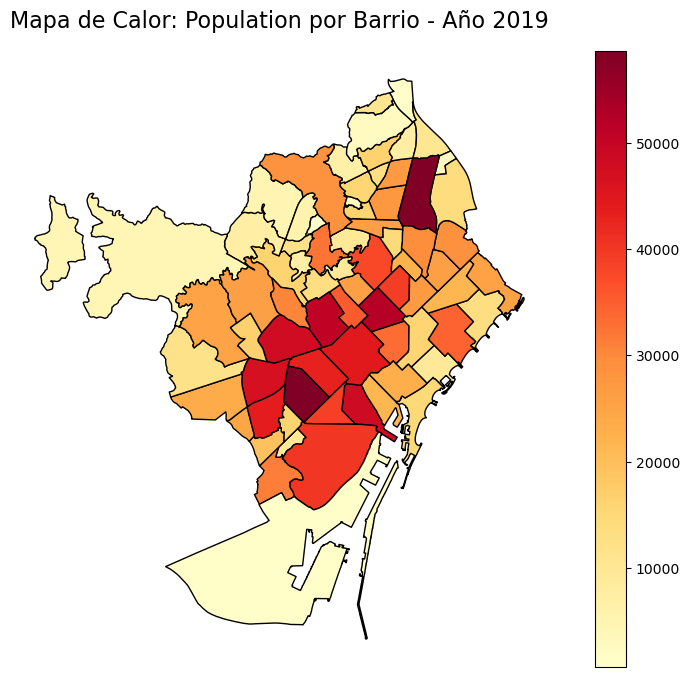

In [21]:
# Creamos el mapa base
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Con datos de 2019
barrios_2019.plot(column='population', cmap='YlOrRd', legend=True, edgecolor='black', ax=ax)

ax.set_title('Mapa de Calor: Population por Barrio - Año 2019', fontsize=16)
ax.axis('off')  # Ocultar ejes

plt.savefig("population_2019.jpg", format="jpg", dpi=300)

# Mostrar el mapa
plt.show()

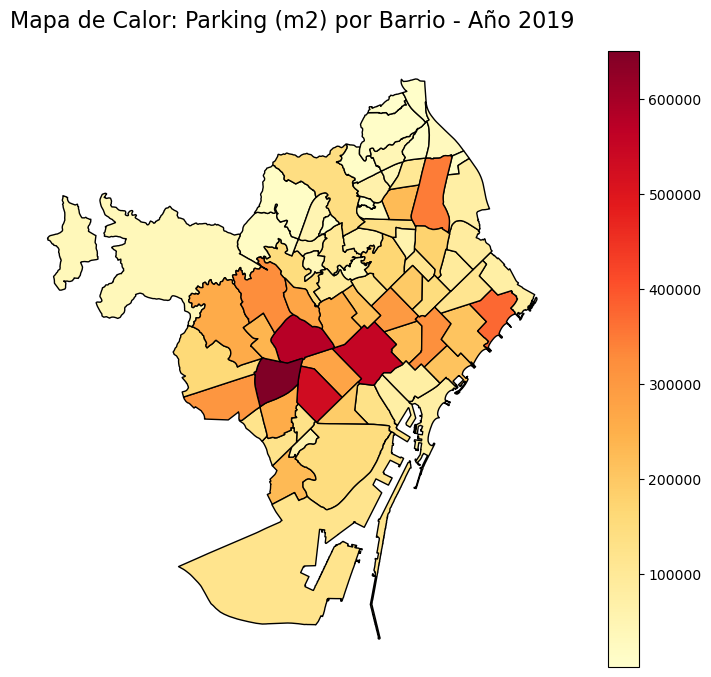

In [22]:
#Para Parking por m2

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

barrios_2019.plot(column='parking(m2)', cmap='YlOrRd', legend=True, edgecolor='black', ax=ax)


ax.set_title('Mapa de Calor: Parking (m2) por Barrio - Año 2019', fontsize=16)
ax.axis('off') 

plt.savefig("parking_2019.jpg", format="jpg", dpi=300)
# Mostrar el mapa
plt.show()

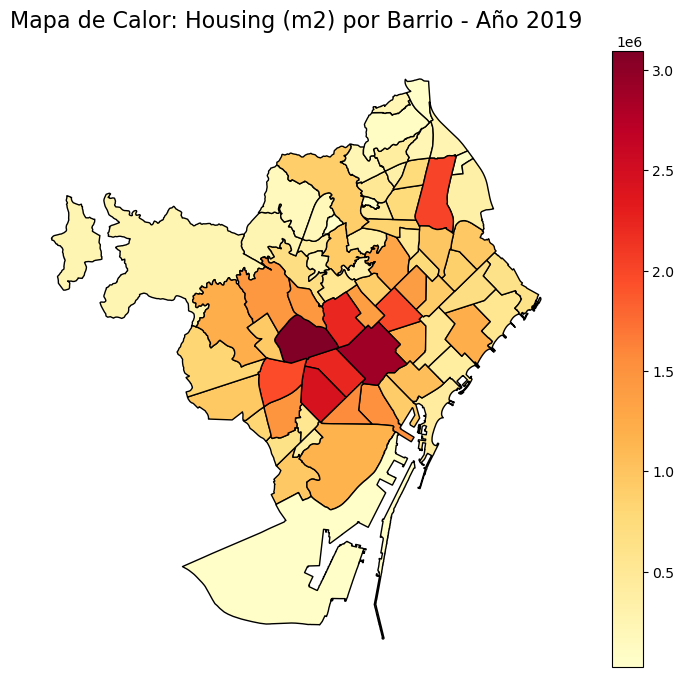

In [23]:
#Para Housing por m2

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

barrios_2019.plot(column='housing(m2)', cmap='YlOrRd', legend=True, edgecolor='black', ax=ax)

ax.set_title('Mapa de Calor: Housing (m2) por Barrio - Año 2019', fontsize=16)
ax.axis('off') 
plt.savefig("housing_2019.jpg", format="jpg", dpi=300)
# Mostrar el mapa
plt.show()

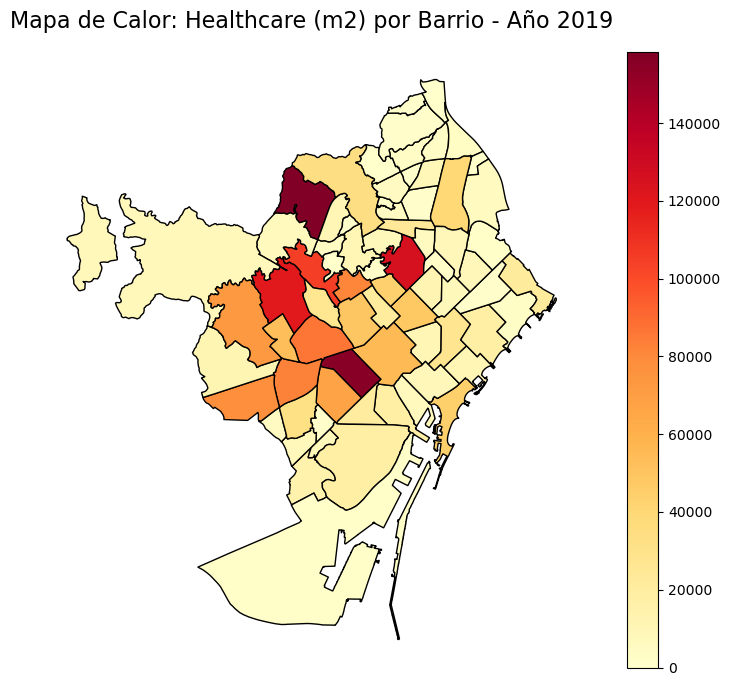

In [24]:
#Para Healthcare por m2

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

barrios_2019.plot(column='healthcare(m2)', cmap='YlOrRd', legend=True, edgecolor='black', ax=ax)

ax.set_title('Mapa de Calor: Healthcare (m2) por Barrio - Año 2019', fontsize=16)
ax.axis('off')  
plt.savefig("healthcare_2019.jpg", format="jpg", dpi=300)
# Mostrar el mapa
plt.show()

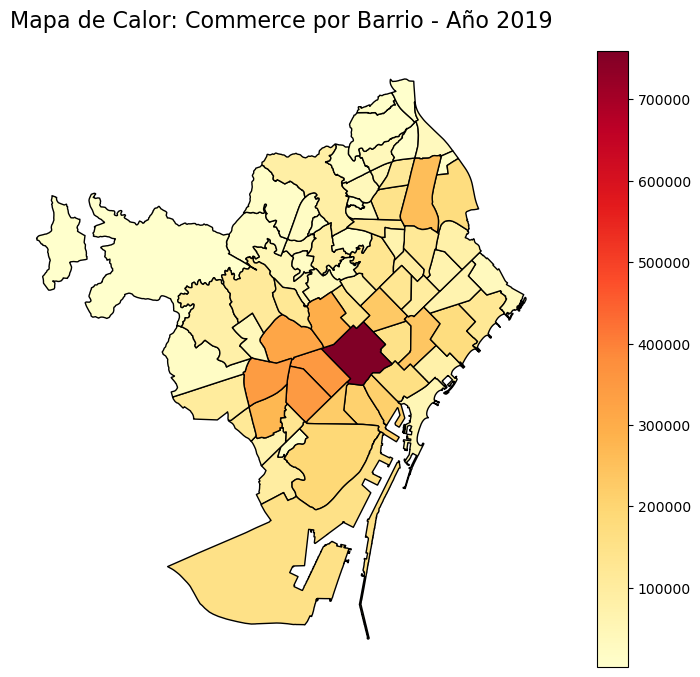

In [25]:
# Creamos el mapa base
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Con datos de 2019
barrios_2019.plot(column='commerce(m2)', cmap='YlOrRd', legend=True, edgecolor='black', ax=ax)

ax.set_title('Mapa de Calor: Commerce por Barrio - Año 2019', fontsize=16)
ax.axis('off')  # Ocultar ejes

plt.savefig("commerce_2019.jpg", format="jpg", dpi=300)

# Mostrar el mapa
plt.show()

In [26]:
# Ordenar los barrios por población de forma descendente
top_barrios = barrios_2019.sort_values(by='population', ascending=False).head(10)

# Mostrar el resultado
print("Top 10 barrios con mayor población en 2019:")
print(top_barrios[['neighbourhood', 'population']])

Top 10 barrios con mayor población en 2019:
                       neighbourhood  population
54    la nova esquerra de l'eixample     58621.0
354                      sant andreu     58508.0
39                la sagrada família     52245.0
169                la vila de gràcia     50926.0
14                          el raval     48263.0
74            sant gervasi - galvany     47915.0
194                        les corts     46731.0
44            la dreta de l'eixample     44325.0
189                            sants     43763.0
49   l'antiga esquerra de l'eixample     43228.0


Comenzamos a analizar uno de los medios de transporte sostenible, las bicicletas de alquiler,especificamente "Bicing". Contamos con una base de datos que contiene las ubicaciones de las estaciones y nos interesa saber en que barrio se encuentra cada una para poder hacer un estudio de relacion con los otros factores de interes. 

El dataset cuenta con latitud y longitud para la ubicacion de las estaciones por lo que sera necesario hacer uso del file shp nuevamente. 

In [27]:

#ruta_archivo2 = "C:\\Users\\jramirez_voyansi\\Desktop\\Ironhack\\Proyecto_Final\\2019_INFO.csv"
ruta_archivo2 = "C:\\Users\\jramirez_voyansi\\Desktop\\Ironhack\\Proyecto_Final\\2019_INFO.csv"

# Lee el archivo CSV en un DataFrame
bicing = pd.read_csv(ruta_archivo2)

C:\Users\jramirez_voyansi\AppData\Local\Temp\ipykernel_3772\1308529169.py:5: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  bicing = pd.read_csv(ruta_archivo2)


In [28]:
bicing.head()

,Unnamed: 0,station_id,date,name,physical_configuration,lat,lon,altitude,address,post_code,capacity,last_updated,ttl,cross_street,nearby_distance
0,0,1,2019-03-28,01 - C/ GRAN VIA CORTS CATALANES 760,ELECTRICBIKESTATION,41.397952,2.180042,0,01 - C/ GRAN VIA CORTS CATALANES 760,8013,30,1553795917,17,NaN,NaN
1,1,1,2019-03-29,01 - C/ GRAN VIA CORTS CATALANES 760,ELECTRICBIKESTATION,41.397952,2.180042,0,01 - C/ GRAN VIA CORTS CATALANES 760,8013,30,1553814282,14,NaN,NaN
2,2,1,2019-03-30,01 - C/ GRAN VIA CORTS CATALANES 760,ELECTRICBIKESTATION,41.397952,2.180042,0,01 - C/ GRAN VIA CORTS CATALANES 760,8013,30,1553900698,30,NaN,NaN
3,3,1,2019-03-31,01 - C/ GRAN VIA CORTS CATALANES 760,ELECTRICBIKESTATION,41.397952,2.180042,0,01 - C/ GRAN VIA CORTS CATALANES 760,8013,30,1553987085,17,NaN,NaN
4,4,2,2019-03-28,"02 - C/ ROGER DE FLOR, 126",ELECTRICBIKESTATION,41.395530,2.177060,0,"02 - C/ ROGER DE FLOR, 126",8908,27,1553795917,17,NaN,NaN


In [29]:
# Ambos datasets (barrios y estaciones) deben estar en el mismo CRS
barrios_geo = barrios_geo.to_crs(epsg=4326)  
bicing['geometry'] = [Point(xy) for xy in zip(bicing['lon'], bicing['lat'])]
bicing_gdf = gpd.GeoDataFrame(bicing, geometry='geometry', crs="EPSG:4326")

# Realizamos la intersección espacial (join) entre las estaciones y los barrios
bicing_con_barrios = gpd.sjoin(bicing_gdf, barrios_geo, how="left", predicate='within')

# Imprimir el resultado con el barrio asignado
print(bicing_con_barrios[['station_id','lat', 'lon', 'post_code', 'neighbourhood']])

        station_id        lat       lon post_code       neighbourhood
0                1  41.397952  2.180042      8013       el fort pienc
0                1  41.397952  2.180042      8013       el fort pienc
0                1  41.397952  2.180042      8013       el fort pienc
0                1  41.397952  2.180042      8013       el fort pienc
0                1  41.397952  2.180042      8013       el fort pienc
...            ...        ...       ...       ...                 ...
112789         496  41.404839  2.174820         1  la sagrada família
112789         496  41.404839  2.174820         1  la sagrada família
112789         496  41.404839  2.174820         1  la sagrada família
112789         496  41.404839  2.174820         1  la sagrada família
112789         496  41.404839  2.174820         1  la sagrada família

[563946 rows x 5 columns]


In [30]:
# Agrupamos por barrio y contar las estaciones únicas (usando 'station_id')
cantidad_estaciones_por_barrio = bicing_con_barrios.groupby('neighbourhood')['station_id'].nunique().reset_index(name='cantidad_estaciones')

# Mostrar el resultado
print(cantidad_estaciones_por_barrio)

                                   neighbourhood  cantidad_estaciones
0                                  baró de viver                    1
1   diagonal mar i el front marítim del poblenou                    8
2                               el baix guinardó                    5
3                                 el barri gòtic                   13
4                          el besòs i el maresme                    6
5                                  el bon pastor                    4
6             el camp d'en grassot i gràcia nova                    4
7                     el camp de l'arpa del clot                    3
8                                        el clot                    5
9                       el congrés i els indians                    3
10                                 el fort pienc                   12
11                                   el guinardó                    4
12             el parc i la llacuna del poblenou                   10
13                  

In [31]:
bicing_con_barrios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 563946 entries, 0 to 112789
Columns: 101 entries, Unnamed: 0_left to emissions_proxy
dtypes: float64(43), geometry(1), int64(5), object(52)
memory usage: 438.9+ MB


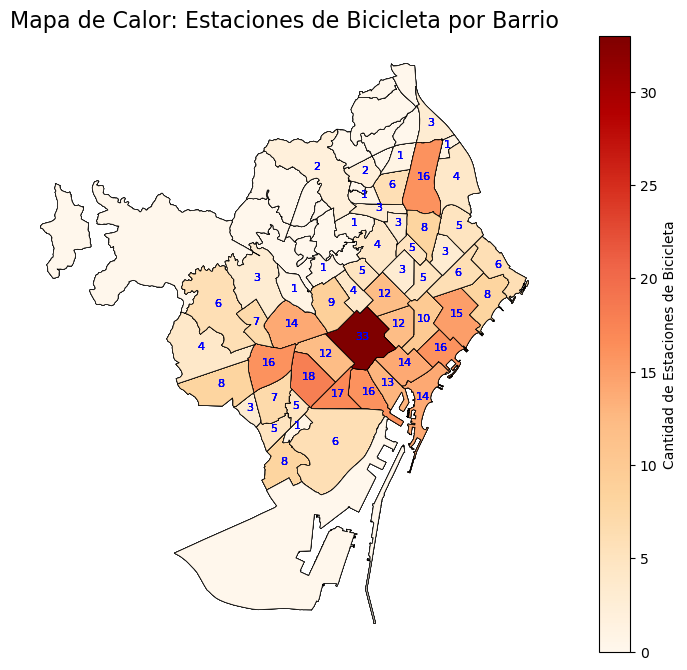

In [32]:
#Realizamos el mapa de calor de Estaciones por barrio para observar la densidad de las mismas.

# 1. Agrupamos por barrio para obtener la cantidad única de estaciones
cantidad_estaciones_por_barrio = bicing_con_barrios.groupby('neighbourhood')['station_id'].nunique().reset_index(name='cantidad_estaciones')

# 2. Asignamos los datos al GeoDataFrame de barrios
barrios_geo = barrios_geo.merge(cantidad_estaciones_por_barrio, on='neighbourhood', how='left')

# 3. Rellenamos valores NaN en 'cantidad_estaciones' con 0
barrios_geo['cantidad_estaciones'] = barrios_geo['cantidad_estaciones'].fillna(0)

# 4. Crear el mapa coroplético
fig, ax = plt.subplots(figsize=(12, 8))

# Dibujar los barrios con el número de estaciones
barrios_geo.plot(
    column='cantidad_estaciones',
    ax=ax,
    cmap='OrRd',  
    legend=True,
    legend_kwds={
        'label': "Cantidad de Estaciones de Bicicleta",
        'orientation': "vertical"
    },
    edgecolor='black',
    linewidth=0.5
)

# Añadir etiquetas con el número de estaciones en el centro de cada barrio
for idx, row in barrios_geo.iterrows():
    if row['cantidad_estaciones'] > 0:  # Mostrar solo barrios con estaciones
        centroid = row['geometry'].centroid
        ax.annotate(
            text=int(row['cantidad_estaciones']),
            xy=(centroid.x, centroid.y),
            fontsize=8,
            ha='center',
            color='blue'  
        )

# Título y ajustes
ax.set_title('Mapa de Calor: Estaciones de Bicicleta por Barrio', fontsize=16)
ax.set_axis_off()

# Mostrar el mapa
plt.show()

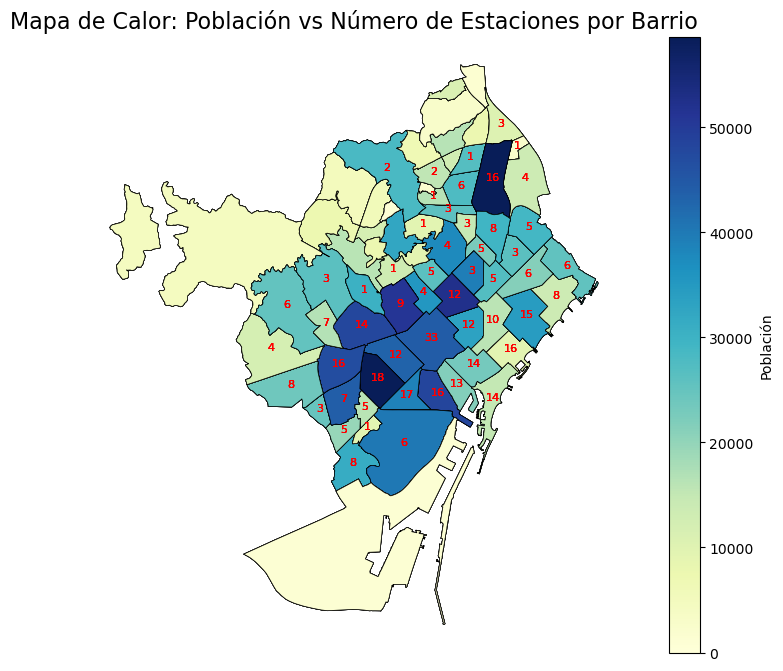

In [33]:
# 1. Crear el mapa coroplético basado en la población
fig, ax = plt.subplots(figsize=(12, 8))

# Dibujar los barrios con el mapa de calor basado en la población
barrios_geo.plot(
    column='population',  # Cambia esto si la columna tiene otro nombre
    ax=ax,
    cmap='YlGnBu',  # Cambia el colormap según tu preferencia
    legend=True,
    legend_kwds={
        'label': "Población",
        'orientation': "vertical"
    },
    edgecolor='black',
    linewidth=0.5
)

# Añadir etiquetas con el número de estaciones en el centro de cada barrio
for idx, row in barrios_geo.iterrows():
    if row['cantidad_estaciones'] > 0:  # Mostrar solo barrios con estaciones
        centroid = row['geometry'].centroid
        ax.annotate(
            text=int(row['cantidad_estaciones']),
            xy=(centroid.x, centroid.y),
            fontsize=8,
            ha='center',
            color='red'  # Cambia el color si lo prefieres
        )

# Título y ajustes
ax.set_title('Mapa de Calor: Población vs Número de Estaciones por Barrio', fontsize=16)
ax.set_axis_off()
plt.savefig("population_bicing_stations.jpg", format="jpg", dpi=300)
# Mostrar el mapa
plt.show()

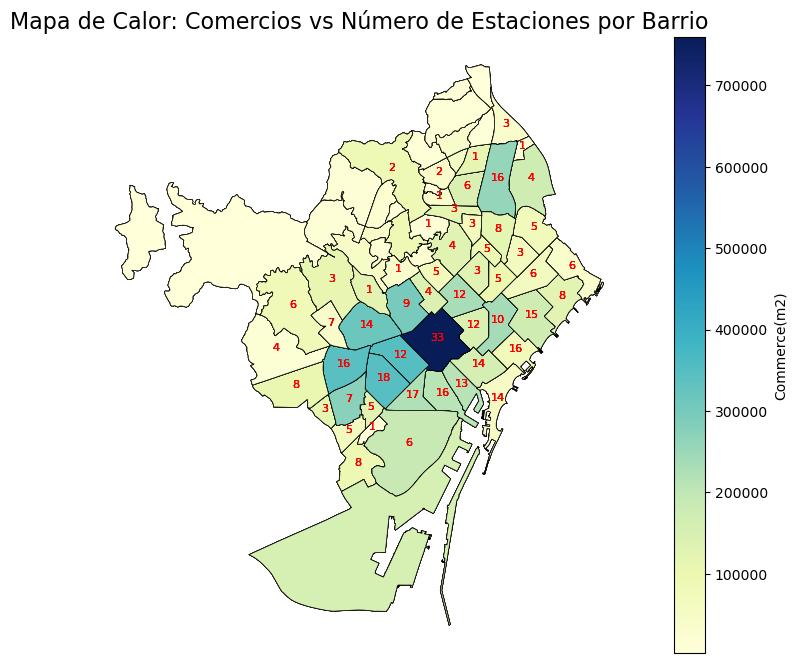

In [34]:
# 1. Crear el mapa coroplético basado en la población
fig, ax = plt.subplots(figsize=(12, 8))

# Dibujar los barrios con el mapa de calor basado en la población
barrios_geo.plot(
    column='commerce(m2)',  # Cambia esto si la columna tiene otro nombre
    ax=ax,
    cmap='YlGnBu',  # Cambia el colormap según tu preferencia
    legend=True,
    legend_kwds={
        'label': "Commerce(m2)",
        'orientation': "vertical"
    },
    edgecolor='black',
    linewidth=0.5
)

# Añadir etiquetas con el número de estaciones en el centro de cada barrio
for idx, row in barrios_geo.iterrows():
    if row['cantidad_estaciones'] > 0:  # Mostrar solo barrios con estaciones
        centroid = row['geometry'].centroid
        ax.annotate(
            text=int(row['cantidad_estaciones']),
            xy=(centroid.x, centroid.y),
            fontsize=8,
            ha='center',
            color='red'  # Cambia el color si lo prefieres
        )

# Título y ajustes
ax.set_title('Mapa de Calor: Comercios vs Número de Estaciones por Barrio', fontsize=16)
ax.set_axis_off()
plt.savefig("commerce(m2)_bicing_stations.jpg", format="jpg", dpi=300)
# Mostrar el mapa
plt.show()

In [35]:
# Seleccionar las columnas relevantes para el análisis
factores = [
    'housing(m2)', 'parking(m2)', 'commerce(m2)', 'population',
    'industry(m2)', 'offices(m2)', 'education(m2)', 'healthcare(m2)',
    'hostelry(m2)', 'sports(m2)', 'religious(m2)', 'entertainment(m2)'
]

# Crear un DataFrame de rankings
rankings = barrios_2019[factores].rank(ascending=False, method='min').astype(int)
rankings['neighbourhood'] = barrios_2019['neighbourhood']

# Filtrar el barrio "La Dreta de l'Eixample"
dreta_rankings = rankings[rankings['neighbourhood'] == "la dreta de l'eixample"]

# Mostrar los rankings
print(dreta_rankings.T)  # Transponer para mejor visualización

                                       44
housing(m2)                             2
parking(m2)                             3
commerce(m2)                            1
population                              8
industry(m2)                            5
offices(m2)                             1
education(m2)                           6
healthcare(m2)                         12
hostelry(m2)                            1
sports(m2)                             33
religious(m2)                           1
entertainment(m2)                       6
neighbourhood      la dreta de l'eixample


In [36]:
# Lista de barrios de interés
barrios_interes = [
    "la dreta de l'eixample", 
    "la nova esquerra de l'eixample",
    "el raval",
    "sant antoni", 
    "la vila olímpica del poblenou", 
    "les corts"
]

# Normalizar los nombres de los barrios en rankings
rankings['neighbourhood_normalized'] = rankings['neighbourhood'].str.lower().str.strip()

# Filtrar los rankings para los barrios de interés
barrios_seleccionados = rankings[rankings['neighbourhood_normalized'].isin(barrios_interes)]

# Mostrar los rankings transpuestos para una mejor visualización
print(barrios_seleccionados.set_index('neighbourhood_normalized')[factores].T)

neighbourhood_normalized  el raval  la dreta de l'eixample  \
housing(m2)                     10                       2   
parking(m2)                     34                       3   
commerce(m2)                    13                       1   
population                       5                       8   
industry(m2)                    21                       5   
offices(m2)                     20                       1   
education(m2)                    5                       6   
healthcare(m2)                  28                      12   
hostelry(m2)                     2                       1   
sports(m2)                      38                      33   
religious(m2)                    7                       1   
entertainment(m2)                3                       6   

neighbourhood_normalized  la nova esquerra de l'eixample  sant antoni  \
housing(m2)                                            3            9   
parking(m2)                                    

In [37]:
# Seleccionar las columnas relevantes para el análisis
factores = [
    'housing(m2)', 'parking(m2)', 'commerce(m2)', 'population',
    'industry(m2)', 'offices(m2)', 'education(m2)', 'healthcare(m2)',
    'hostelry(m2)', 'sports(m2)', 'religious(m2)', 'entertainment(m2)'
]

# Crear un DataFrame de rankings
rankings = barrios_2019[factores].rank(ascending=False, method='min').astype(int)
rankings['neighbourhood'] = barrios_2019['neighbourhood']

# Filtrar el barrio "La Dreta de l'Eixample"
dreta_rankings = rankings[rankings['neighbourhood'] == "sant gervasi - galvany"]

# Mostrar los rankings
print(dreta_rankings.T)  # Transponer para mejor visualización

                                       74
housing(m2)                             1
parking(m2)                             2
commerce(m2)                            5
population                              6
industry(m2)                           12
offices(m2)                             2
education(m2)                          13
healthcare(m2)                          6
hostelry(m2)                            9
sports(m2)                              9
religious(m2)                           6
entertainment(m2)                       9
neighbourhood      sant gervasi - galvany


In [38]:
# Lista de barrios de interés
barrios_interes = [
    "la dreta de l'eixample", 
    "la nova esquerra de l'eixample", 
    "el raval",
    "sant antoni", 
    "la vila olímpica del poblenou", 
    "les corts"
]

# 2. Filtrar los barrios de interés
cantidad_estaciones_por_barrio_interes = cantidad_estaciones_por_barrio[cantidad_estaciones_por_barrio['neighbourhood'].isin(barrios_interes)]

# 3. Unir con los datos de los factores
factores = [
    'housing(m2)', 'parking(m2)', 'commerce(m2)', 'population',
    'industry(m2)', 'offices(m2)', 'education(m2)', 'healthcare(m2)',
    'hostelry(m2)', 'sports(m2)', 'religious(m2)', 'entertainment(m2)'
]

# Unir los datos de cantidad de estaciones con los factores
barrios_factores = barrios_2019[barrios_2019['neighbourhood'].isin(barrios_interes)][['neighbourhood'] + factores]
barrios_factores = barrios_factores.merge(cantidad_estaciones_por_barrio_interes, on='neighbourhood')

# 4. Seleccionar solo las columnas numéricas para calcular la correlación
barrios_factores_numericos = barrios_factores.select_dtypes(include=['float64', 'int64'])

# 5. Calcular la matriz de correlación
correlacion = barrios_factores_numericos.corr()


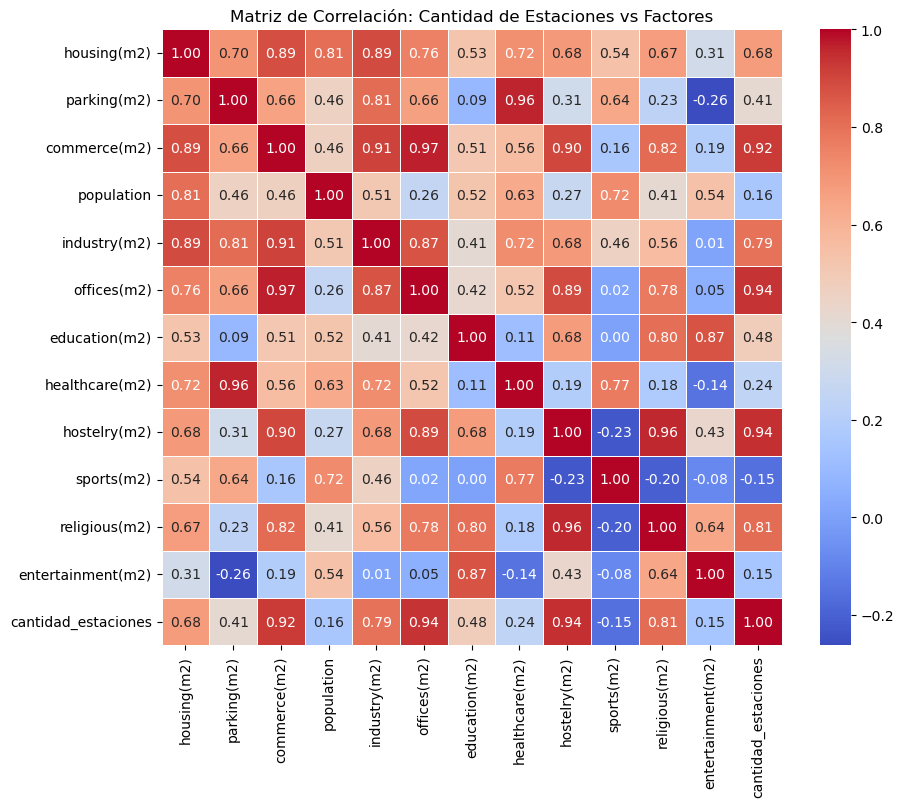

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación: Cantidad de Estaciones vs Factores")
plt.show()

In [40]:
factores_interes = factores + ['cantidad_estaciones']  # Añadir la columna de interés
barrios_factores_reducido = barrios_factores[factores_interes]  # Filtrar columnas relevantes

# Calcular las correlaciones con 'cantidad_estaciones'
correlaciones = barrios_factores_reducido.corr()['cantidad_estaciones'].drop('cantidad_estaciones')

# Mostrar los resultados ordenados
print("Correlaciones con la cantidad de estaciones:")
print(correlaciones.sort_values(ascending=False))

Correlaciones con la cantidad de estaciones:
hostelry(m2)         0.941505
offices(m2)          0.938963
commerce(m2)         0.924291
religious(m2)        0.808221
industry(m2)         0.793787
housing(m2)          0.678783
education(m2)        0.479218
parking(m2)          0.410200
healthcare(m2)       0.243494
population           0.156970
entertainment(m2)    0.148538
sports(m2)          -0.154977
Name: cantidad_estaciones, dtype: float64


Al analizar la correlacion cantidad de estaciones - factores en los 6 barrios con mayor cantidad de las mismas, salta a la vista que hay una correlacion con el comercio, las oficinas y la hoteleria, seguido por la industria, quedando un poco mas rezagado, el factor de housing y para nuestra sorpresa la cantidad de poblacion no es relevante.

Ahora queremos analizar la cantidad de vehiculos registrados por barrio. Pudiendo ser esto un factor en contra de la mobilidad sostenible. 

In [41]:
# Analisis de Cantidad de vehiculos por barrio\

#ruta_archivo5 = r"C:\\Users\\jramirez_voyansi\\Desktop\\Ironhack\\Proyecto_Final\\2019_vehicles_servei.csv.csv"
ruta_archivo5 = r"C:\\Users\\jramirez_voyansi\\Desktop\\Ironhack\\Proyecto_Final\\2019_vehicles_servei.csv.csv"

vehiculos = pd.read_csv(ruta_archivo5)


In [42]:
vehiculos.head()


,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Tipus_Servei,Total
0,2019,1,Ciutat Vella,1,el Raval,1,Públic,70
1,2019,1,Ciutat Vella,1,el Raval,2,Públic,10
2,2019,1,Ciutat Vella,1,el Raval,3,Públic,62
3,2019,1,Ciutat Vella,1,el Raval,4,Públic,29
4,2019,1,Ciutat Vella,1,el Raval,5,Públic,25


In [43]:
# Renombramos la columna 'Nom_Barri' a 'neighbourhood' y convertimos sus valores a minúsculas

vehiculos.rename(columns={'Nom_Barri': 'neighbourhood'}, inplace=True)
vehiculos['neighbourhood'] = vehiculos['neighbourhood'].str.lower()

print(vehiculos.head())

    Any Codi_Districte Nom_Districte Codi_Barri neighbourhood Seccio_Censal  \
0  2019              1  Ciutat Vella          1      el raval             1   
1  2019              1  Ciutat Vella          1      el raval             2   
2  2019              1  Ciutat Vella          1      el raval             3   
3  2019              1  Ciutat Vella          1      el raval             4   
4  2019              1  Ciutat Vella          1      el raval             5   

  Tipus_Servei  Total  
0       Públic     70  
1       Públic     10  
2       Públic     62  
3       Públic     29  
4       Públic     25  


In [44]:
#Filtramos para que descarte los tipo de vehiculos publicos.
vehiculos_filtrados = vehiculos[vehiculos['Tipus_Servei'].isin(['Privat', 'No consta'])]

# Mostrar los primeros registros filtrados
print(vehiculos_filtrados.head())

       Any Codi_Districte Nom_Districte Codi_Barri neighbourhood  \
1069  2019              1  Ciutat Vella          1      el raval   
1070  2019              1  Ciutat Vella          1      el raval   
1071  2019              1  Ciutat Vella          1      el raval   
1072  2019              1  Ciutat Vella          1      el raval   
1073  2019              1  Ciutat Vella          1      el raval   

     Seccio_Censal Tipus_Servei  Total  
1069             1       Privat    545  
1070             2       Privat    363  
1071             3       Privat    683  
1072             4       Privat    784  
1073             5       Privat    597  


In [45]:
#Agrupamos por barrio para obtener la cantidad única de estaciones
total_vehiculos= vehiculos_filtrados.groupby('neighbourhood')['Total'].sum().reset_index(name='cantidad_vehiculos')

In [46]:
#Comprobamos que haya funcionado
total_vehiculos.sample(10)

,neighbourhood,cantidad_vehiculos
61,sant gervasi - la bonanova,18380
21,el putget i farró,17670
34,la marina de port,14192
60,sant gervasi - galvany,37400
69,vallcarca i els penitents,9164
39,la sagrada família,22797
9,el bon pastor,7516
44,la trinitat vella,4005
1,camp de l'arpa del clot,16877
37,la nova esquerra de l'eixample,29111


In [47]:
# Chequeamos que ambas dataset cuenten con los nombres escritos de identica manera. 
barrios_nombres5 = set(barrios_2019['neighbourhood'].unique())
bcn_nombres5 = set(total_vehiculos['neighbourhood'].unique())

# Comparar nombres
faltantes_en_bcn5 = barrios_nombres5 - bcn_nombres5  # Barrios que están en barrios_geo pero no en Bcn_data
faltantes_en_vehiculos5 = bcn_nombres5 - barrios_nombres5  # Barrios que están en Bcn_data pero no en barrios_geo

print("Barrios en barrios_2019 pero no en vehiculos:", faltantes_en_bcn5)
print("Barrios en vehiculos pero no en barrios_2019:", faltantes_en_vehiculos5)

Barrios en barrios_2019 pero no en vehiculos: {'la vila de gràcia', 'sant pere santa caterina i la ribera', 'vallvidrera el tibidabo i les planes', 'el putxet i el farró', 'el barri gòtic', 'el poble sec - parc montjuïc', "el camp de l'arpa del clot"}
Barrios en vehiculos pero no en barrios_2019: {'el putget i farró', 'la font de la guatlla', 'vila de gràcia', 'sant pere, santa caterina i la ribera', 'vallvidrera, el tibidabo i les planes', 'el gòtic', "camp de l'arpa del clot", 'no consta', 'el poble sec'}


In [48]:
total_vehiculos['neighbourhood'] = total_vehiculos['neighbourhood'].replace({
    "camp de l'arpa del clot": "el camp de l'arpa del clot",
    'el gòtic':'el barri gòtic',
    'vila de gràcia':'la vila de gràcia',
    'sant pere, santa caterina i la ribera':'sant pere santa caterina i la ribera',
    'el poble sec':'el poble sec - parc montjuïc',
    'vallvidrera, el tibidabo i les planes':'vallvidrera el tibidabo i les planes',
    'el putget i farró':'el putxet i el farró',
    'la font de la guatlla':'sants',
    'no consta':'sarrià',})

In [49]:
# Realizamos el merge entre 'barrios_2019' y 'total_vehiculos' usando la columna 'neighbourhood'
barrios_2019 = pd.merge(barrios_2019, total_vehiculos[['neighbourhood', 'cantidad_vehiculos']], on='neighbourhood', how='left')

# Verificar el resultado
print(barrios_2019.head())

  ID_ANNEX ANNEXDESCR ID_TEMA               TEMA_DESCR ID_CONJUNT CONJ_DESCR  \
0       01   Grup - I    0104  Unitats Administratives     010413     Barris   
1       01   Grup - I    0104  Unitats Administratives     010413     Barris   
2       01   Grup - I    0104  Unitats Administratives     010413     Barris   
3       01   Grup - I    0104  Unitats Administratives     010413     Barris   
4       01   Grup - I    0104  Unitats Administratives     010413     Barris   

  ID_SUBCONJ SCONJ_DESC  ID_ELEMENT       ELEM_DESCR  ...  \
0   01041301      Barri  0104130101  LÃ­mit de barri  ...   
1   01041301      Barri  0104130101  LÃ­mit de barri  ...   
2   01041301      Barri  0104130101  LÃ­mit de barri  ...   
3   01041301      Barri  0104130101  LÃ­mit de barri  ...   
4   01041301      Barri  0104130101  LÃ­mit de barri  ...   

  binary_rent_growth_1000_hab disp_income(€/year)     year_mean      RFD100  \
0                         1.0             16999.0  20993.561644   80.9724

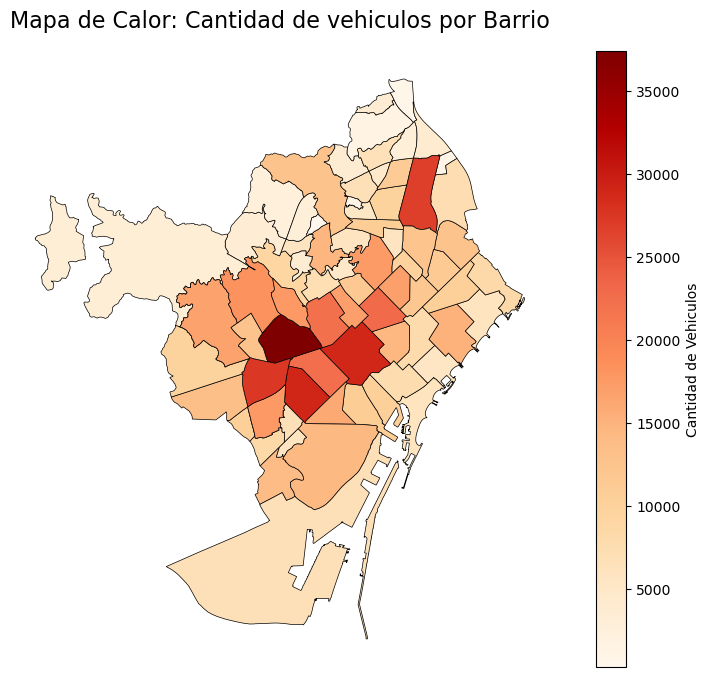

In [50]:
# Creamos el mapa de calor de cantidad de vehiculos registrados por barrio.

fig, ax = plt.subplots(figsize=(12, 8))

# Dibujar los barrios con el número de estaciones
barrios_2019.plot(
    column='cantidad_vehiculos',
    ax=ax,
    cmap='OrRd',  # Escoge el colormap
    legend=True,
    legend_kwds={
        'label': "Cantidad de Vehiculos",
        'orientation': "vertical"
    },
    edgecolor='black',
    linewidth=0.5
)

# Título y ajustes
ax.set_title('Mapa de Calor: Cantidad de vehiculos por Barrio', fontsize=16)
ax.set_axis_off()

# Mostrar el mapa
plt.show()

In [51]:
correlacion = barrios_2019['cantidad_vehiculos'].corr(barrios_2019['parking(m2)'])

# Imprimir el resultado
print(f"La correlación entre 'cantidad_vehiculos' y 'Parking(m2)' es: {correlacion}")

La correlación entre 'cantidad_vehiculos' y 'Parking(m2)' es: 0.8267397255798136


In [52]:
correlacion = barrios_2019['cantidad_vehiculos'].corr(barrios_2019['avg_€/month'])

# Imprimir el resultado
print(f"La correlación entre 'cantidad_vehiculos' y 'Parking(m2)' es: {correlacion}")

La correlación entre 'cantidad_vehiculos' y 'Parking(m2)' es: 0.3555028811673096


In [53]:
barrios_2019.to_csv('barrios_2019.csv', index=False, encoding='utf-8')

In [54]:
# Crear una nueva columna con los vehículos por mil
barrios_2019['vehiculos_por_mil'] = barrios_2019['cantidad_vehiculos'] / 1000

# Verificar los datos
print(barrios_2019[['neighbourhood', 'parking(m2)', 'vehiculos_por_mil']].head())

          neighbourhood  parking(m2)  vehiculos_por_mil
0     la marina de port       229625             14.192
1  la font d'en fargues        58176              5.949
2              el raval       128820             10.985
3        el barri gòtic        74989             10.502
4        la barceloneta        74434              5.990


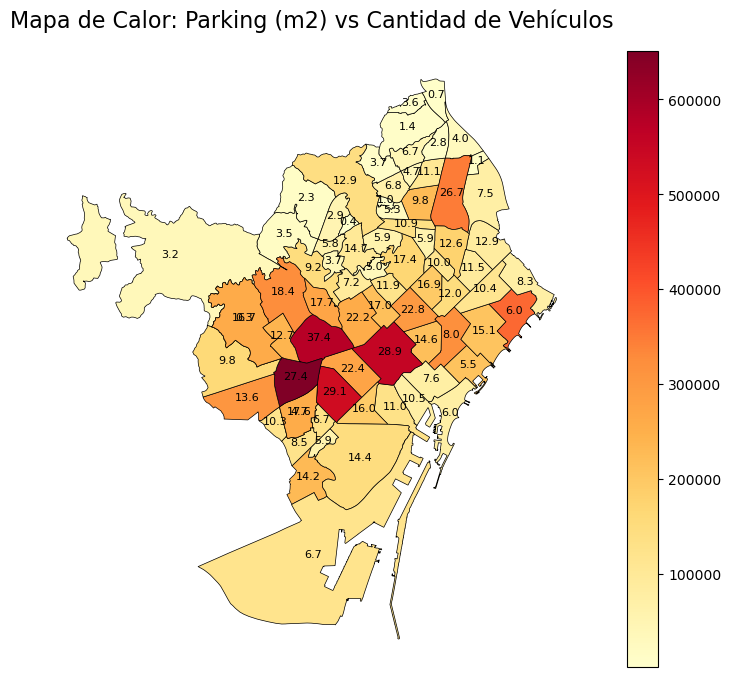

In [55]:

# Crear el mapa base
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Dibujar el mapa de calor para 'parking(m2)'
barrios_2019.plot(
    column='parking(m2)',  # Columna para el mapa de calor
    cmap='YlOrRd',         # Esquema de colores
    legend=True,           # Mostrar la leyenda
    linewidth=0.5,         # Grosor de los bordes
    edgecolor='black',     # Color de los bordes
    ax=ax                  # Ejes del gráfico
)

# Añadir etiquetas de 'vehiculos_por_mil'
for _, row in barrios_2019.iterrows():
    # Obtener el centroide del barrio
    centroid = row['geometry'].centroid
    # Añadir el valor de vehículos por mil habitantes como texto
    ax.text(
        centroid.x, centroid.y, f"{row['vehiculos_por_mil']:.1f}",
        fontsize=8, ha='center', color='black'
    )

# Personalizar el mapa
ax.set_title('Mapa de Calor: Parking (m2) vs Cantidad de Vehículos', fontsize=16)
ax.axis('off')  # Ocultar ejes

plt.savefig("Parking(m2)_cantidad_vehiculos.jpg", format="jpg", dpi=300)

# Mostrar el mapa
plt.show()

In [56]:
barrios_2019 = barrios_2019.merge(
    cantidad_estaciones_por_barrio[['neighbourhood', 'cantidad_estaciones']],  # Seleccionar las columnas relevantes
    on='neighbourhood',  # Realizar el merge por la columna 'neighbourhood'
    how='left'  # 'left' para mantener todas las filas de barrios_2019
)

# Reemplazar los valores NaN en 'cantidad_estaciones' por 0
barrios_2019['cantidad_estaciones'] = barrios_2019['cantidad_estaciones'].fillna(0)

# Verificar que la unión fue exitosa y que los valores NaN se reemplazaron
print(barrios_2019.head(10))

  ID_ANNEX ANNEXDESCR ID_TEMA               TEMA_DESCR ID_CONJUNT CONJ_DESCR  \
0       01   Grup - I    0104  Unitats Administratives     010413     Barris   
1       01   Grup - I    0104  Unitats Administratives     010413     Barris   
2       01   Grup - I    0104  Unitats Administratives     010413     Barris   
3       01   Grup - I    0104  Unitats Administratives     010413     Barris   
4       01   Grup - I    0104  Unitats Administratives     010413     Barris   
5       01   Grup - I    0104  Unitats Administratives     010413     Barris   
6       01   Grup - I    0104  Unitats Administratives     010413     Barris   
7       01   Grup - I    0104  Unitats Administratives     010413     Barris   
8       01   Grup - I    0104  Unitats Administratives     010413     Barris   
9       01   Grup - I    0104  Unitats Administratives     010413     Barris   

  ID_SUBCONJ SCONJ_DESC  ID_ELEMENT       ELEM_DESCR  ...     year_mean  \
0   01041301      Barri  0104130101  LÃ­mit 

In [58]:
barrios_2019.to_csv('barrios_2019.csv', index=False, encoding='utf-8')